In [2]:
import numpy as np
def FTBS1(initial_array,diffx,difft,windspeed):
    c=difft*windspeed/diffx
    q=np.zeros((5,5))
    q[0][0]=initial_array[0]
    q[0][1]=initial_array[1]
    q[0][2]=initial_array[2]
    q[0][3]=initial_array[3]
    q[0][4]=initial_array[4]
    print (q)
    q[1][1]=q[0][1]-c*(q[0][1]-q[0][0])
    q[1][2]=q[0][2]-c*(q[0][2]-q[0][1])
    q[1][3]=q[0][3]-c*(q[0][3]-q[0][2])
    q[1][4]=q[0][4]-c*(q[0][4]-q[0][3])
    q[2][2]=q[1][2]-c*(q[1][2]-q[1][1])
    q[2][3]=q[1][3]-c*(q[1][3]-q[1][2])
    q[2][4]=q[1][4]-c*(q[1][4]-q[1][3])
    
    return q
FTBS1([2,1,2,1,2],1,0.1,5)

[[2. 1. 2. 1. 2.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


array([[2. , 1. , 2. , 1. , 2. ],
       [0. , 1.5, 1.5, 1.5, 1.5],
       [0. , 0. , 1.5, 1.5, 1.5],
       [0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. ]])

In [3]:
import numpy as np
def FTBS2(initial_array,diffx,difft,windspeed):
    c=difft*windspeed/diffx
    m=len(initial_array)
    q=np.zeros((m,m))
    for i in range (0,m):
        q[0][i]=initial_array[i]
    for k in range (1,m):
        for h in range (k,m):
            q[k][h]=q[k-1][h]-c*(q[k-1][h]-q[k-1][h-1])
    return q
FTBS2([2,4,7,3,6,8],1,0.1,5)

array([[2.   , 4.   , 7.   , 3.   , 6.   , 8.   ],
       [0.   , 3.   , 5.5  , 5.   , 4.5  , 7.   ],
       [0.   , 0.   , 4.25 , 5.25 , 4.75 , 5.75 ],
       [0.   , 0.   , 0.   , 4.75 , 5.   , 5.25 ],
       [0.   , 0.   , 0.   , 0.   , 4.875, 5.125],
       [0.   , 0.   , 0.   , 0.   , 0.   , 5.   ]])

In [ ]:
#Import necessary modules.
import numpy as np
import matplotlib.pyplot as plt
#Create function to call in initial values for q and elements for Courant number.
def drw(initial_array,diffx,difft,windspeed):
#Calculate Courant number.
    c=difft*windspeed/diffx
#Work out how much data can be generated, based on amount in input.
    m=len(initial_array)
#Set up array of zeros to fill.
    q=np.zeros((m,m))
#Generate data based on FTBS scheme.
    for i in range (0,m):
        q[0][i]=initial_array[i]
    for k in range (1,m):
        for h in range (k,m):
            q[k][h]=q[k-1][h]-c*(q[k-1][h]-q[k-1][h-1])
#Place q values for each matching time and space position of matrix in an array.
    qx=q.diagonal()
#Generate x values for graph.
    x=np.arange(0,diffx*m,diffx)
#Plot model.
    plt.plot(x,qx)
    plt.xlabel('x')
    plt.ylabel('q(x)')
    plt.title('Advection Equation FTBS')
    plt.show()
    return
drw([2,4,7,3,6,8],1,0.1,5)
drw([20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],1,0.1,5)

In [ ]:
def FTCS1(initial_array,diffx,difft,windspeed):
    c=difft*windspeed/diffx
    if c>1 or c<0:
        q="Your Courant number is outside of the bounds for stability."
    else:
        m=len(initial_array)
        q=np.zeros((m,m))
        for i in range (0,m):
            q[0][i]=initial_array[i]
        for k in range (1,m-1):
            for h in range (k,m-1):
                q[k][h]=q[k-1][h]-(c/2)*(q[k-1][h+1]-q[k-1][h-1])
    return q
FTCS1([3,4,5,6],7,9,30)

In [ ]:
FTCS1([3,4,5,6],1,0.1,3)

In [ ]:
def LW(initial_array,diffx,difft,windspeed):
    c=difft*windspeed/diffx
    m=len(initial_array)
    q=np.zeros((m,m))
    for i in range (0,m):
        q[0][i]=initial_array[i]
    for k in range (1,m-1):
        for h in range (k,m-1):
            q[k][h]=q[k-1][h]-(c/2)*(q[k-1][h+1]-q[k-1][h-1])+(c**2/2)*(q[k-1][h+1]-2*q[k-1][h]+q[k-1][h-1])
    return q
LW([2,0,0,0,0,0],1,0.1,5)

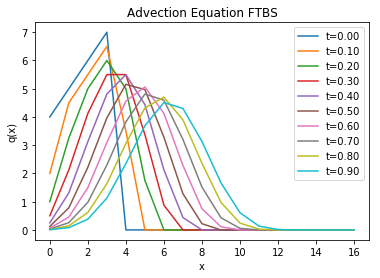

In [2]:
#Import necessary modules.
import numpy as np
import matplotlib.pyplot as plt
#Create function to call in initial values for q and elements for Courant number.
def drwFTBS(initial_array,diffx,difft,windspeed,time):
#Calculate Courant number.
    c=difft*windspeed/diffx
#Work out how much data can be generated, based on amount in input.
    n=len(initial_array)
    m=int(time/difft+1)
#Set up array of zeros to fill.
    q=np.zeros((m,n))
#Generate data based on FTBS scheme.
    for i in range (0,n-1):
        q[0][i]=initial_array[i]
    for h in range (1,m):
        q[h][0]=q[h-1][0]-c*(q[h-1][0]-q[h-1][n-1])
        for j in range (1,n):
            q[h][j]=q[h-1][j]-c*(q[h-1][j]-q[h-1][j-1])
#Generate x values for graph.
    x=np.arange(0,diffx*(n),diffx)
#Plot model.
    for w in range (0,m-1):
        plt.plot(x,q[w],label='t='+("%.2f"%(w*difft)))
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('q(x)')
    plt.title('Advection Equation FTBS')
    plt.show()
    return
drwFTBS([4,5,6,7,0,0,0,0,0,0,0,0,0,0,0,0,0],1,0.1,5,1)

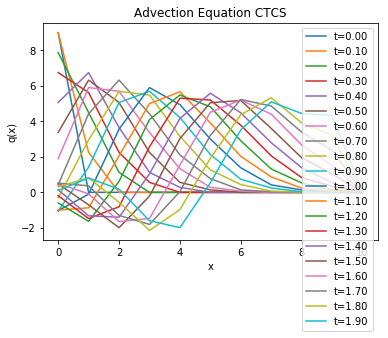

In [5]:
#Import necessary modules.
import numpy as np
import matplotlib.pyplot as plt
#Create function to call in initial values for q and elements for Courant number.
def drwCTCS(initial_array,diffx,difft,windspeed,time):
#Calculate Courant number.
    c=difft*windspeed/diffx
#Work out how much data can be generated, based on amount in input.
    n=len(initial_array)
    m=int(time/difft+1)
#Set up array of zeros to fill.
    q=np.zeros((m,n))
#Generate data based on FTCS scheme for row 1, but CTCS for rest of data.
    for i in range (0,n-1):
        q[0][i]=initial_array[i]
        q[1][0]=-c/2*(q[0][1]-q[0][n-1])+q[0][0]
    for k in range (1,n-1):
        q[1][k]=-c/2*(q[0][k+1]-q[0][k-1])+q[0][k] 
    for h in range (2,m):
        q[h][0]=c*(q[h-1][n-1]-q[h-1][1])+q[h-2][0]
        for j in range (1,n-1):
            q[h][j]=c*(q[h-1][j-1]-q[h-1][j+1])+q[h-2][j]
#Generate x values for graph.
    x=np.arange(0,diffx*(n),diffx)
#Plot model.
    for w in range (0,m-1):
        plt.plot(x,q[w],label='t='+("%.2f"%(w*difft)))
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('q(x)')
    plt.title('Advection Equation CTCS')
    plt.show()
    return
drwCTCS([9,0,0,0,0,0,0,0,0,0,0],1,0.1,5,2)

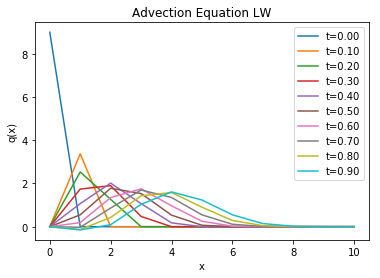

In [4]:
#Import necessary modules.
import numpy as np
import matplotlib.pyplot as plt
#Create function to call in initial values for q and elements for Courant number.
def drwLW(initial_array,diffx,difft,windspeed,time):
#Calculate Courant number.
    c=difft*windspeed/diffx
#Work out how much data can be generated, based on amount in input.
    n=len(initial_array)
    m=int(time/difft+1)
#Set up array of zeros to fill.
    q=np.zeros((m,n))
#Generate data based on LW scheme.
    for i in range (0,n-1):
        q[0][i]=initial_array[i]
    for h in range (1,m):
        for j in range (1,n-1):
            q[h][0]=q[h-1][j]-c/2*(q[h-1][j+1]-q[h-1][n-1])+c**2/2*(q[h-1][j+1]-2*q[h-1][j]+q[h-1][n-1])
            q[h][j]=q[h-1][j]-c/2*(q[h-1][j+1]-q[h-1][j-1])+c**2/2*(q[h-1][j+1]-2*q[h-1][j]+q[h-1][j-1])
#Generate x values for graph.
    x=np.arange(0,diffx*(n),diffx)
#Plot model.
    for w in range (0,m-1):
        plt.plot(x,q[w],label='t='+("%.2f"%(w*difft)))
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('q(x)')
    plt.title('Advection Equation LW')
    plt.show()
    return
drwLW([9,0,0,0,0,0,0,0,0,0,0],1,0.1,5,1)